<a href="https://colab.research.google.com/github/gandalf1819/SF-Opioid-Crisis/blob/master/accuracy_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import ceil
import scipy.stats as stats 
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
%matplotlib inline

In [0]:
d_crime = pd.read_csv("/content/gdrive/My Drive/SF dataset/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [0]:
d_crime.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134


In [0]:
#setting x variable and y variable
x = ["X","Y","PdDistrict"]
y = "Category"

In [0]:
#This function transforms the categorical y into numeric, and prepare it for multiclass classfication
def transformation(dataset,y,x):
  for i in dataset.columns:
    if i not in x and i != y:
      dataset.drop(i,axis=1,inplace=True)         #drop unrelavent columns
  dataset.dropna(axis=0, how='any', inplace=True)    
  neighborhood=pd.get_dummies(dataset["PdDistrict"])
  dataset=pd.concat([dataset,neighborhood],axis=1)
  dataset.drop("PdDistrict",axis=1,inplace=True)
  y_variable = dataset[y].unique()
  dic_y = {}                       # use a dictionary to temporarily hold crime data, transform crime into numeric representation
  i = 1 
  for crime_type in y_variable:         
    dic_y[crime_type]=i
    i=i+1
  dataset.replace(to_replace=dic_y,inplace=True)
  return dataset,dic_y

df,temp = transformation(d_crime,y,x)
df,temp

(         Category           X          Y  ...  SOUTHERN  TARAVAL  TENDERLOIN
 0               1 -122.403405  37.775421  ...         1        0           0
 1               2 -122.485604  37.738821  ...         0        1           0
 2               3 -122.396535  37.710660  ...         0        0           0
 3               2 -122.400131  37.730093  ...         0        0           0
 4               4 -120.500000  90.000000  ...         0        0           0
 ...           ...         ...        ...  ...       ...      ...         ...
 2215019         1 -122.414406  37.775236  ...         1        0           0
 2215020         4 -122.389103  37.766904  ...         0        0           0
 2215021         6 -122.436214  37.771317  ...         0        0           0
 2215022        31 -122.434155  37.802896  ...         0        0           0
 2215023         4 -122.424702  37.735370  ...         0        0           0
 
 [2215023 rows x 13 columns],
 {'ARSON': 7,
  'ASSAULT': 2,
  

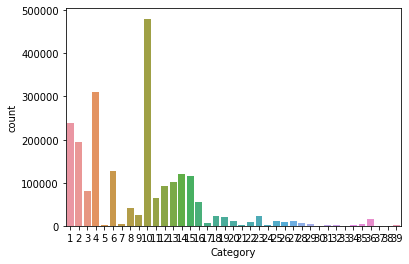

In [0]:
sns.countplot(x="Category",data=df)  #shows the number of crimes in numeric representation

In [0]:
# I dropped Y variable for X, and split dataset 0.3 vs 0.7
X=df.drop("Category",axis=1)
Y=df["Category"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
#build a multinomial logistic model
log_model = LogisticRegression().fit(x_train,y_train)
prediction = log_model.predict(x_test)
prediction

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([10,  4, 10, ..., 14, 10, 10])

In [0]:
#Evaluate the model based on prediction accuracy
model_score = accuracy_score(y_test,prediction)
print("accuracy score is: "+str(model_score))

accuracy score is: 0.42857142857142855


In [0]:
#predict the log-probability of the sample for each class/crime
proba = log_model.predict_proba(x_test)

this table shows the likelihood of each crime happening on that geo cordinates

In [0]:
#this function takes as input a dictionary, and return the key
def getback_columns(dictionary,number):
  for key,value in dictionary.items():
      if value==number:
        return key
      else:
        continue
column_names = []       # this list holds column names so will be used later to construct the output table
for classes in log_model.classes_:
  key = getback_columns(temp,classes)
  column_names.append(key)
column_names
output_table = pd.DataFrame(proba, columns=column_names)
output_table

,NON-CRIMINAL,ASSAULT,SUSPICIOUS OCC,OTHER OFFENSES,SUICIDE,VEHICLE THEFT,ARSON,FRAUD,SECONDARY CODES,LARCENY/THEFT,MISSING PERSON,BURGLARY,WARRANTS,DRUG/NARCOTIC,VANDALISM,ROBBERY,KIDNAPPING,FORGERY/COUNTERFEITING,TRESPASS,DISORDERLY CONDUCT,FAMILY OFFENSES,DRUNKENNESS,WEAPON LAWS,EMBEZZLEMENT,"SEX OFFENSES, FORCIBLE",RECOVERED VEHICLE,STOLEN PROPERTY,DRIVING UNDER THE INFLUENCE,LIQUOR LAWS,TREA,LOITERING,BAD CHECKS,GAMBLING,BRIBERY,RUNAWAY,PROSTITUTION,"SEX OFFENSES, NON FORCIBLE",PORNOGRAPHY/OBSCENE MAT,EXTORTION
0,0.125662,0.077383,0.033189,0.101023,0.000632,0.044714,0.001267,0.026116,0.008407,0.317843,0.017887,0.048995,0.030537,0.017902,0.055412,0.023076,0.001859,0.011502,0.010939,0.004461,0.000258,0.005356,0.005772,0.002084,0.004662,0.002490,0.006329,0.001776,0.001248,0.000006,0.000688,0.000566,0.000260,0.000201,0.000523,0.008258,0.000064,0.000021,0.000632
1,0.073673,0.113586,0.044192,0.185786,0.000368,0.077939,0.004526,0.010320,0.019328,0.126773,0.039421,0.043931,0.047310,0.045893,0.064239,0.029623,0.003745,0.007724,0.007760,0.002455,0.000776,0.002634,0.019632,0.001421,0.004634,0.009186,0.004364,0.002114,0.001230,0.000014,0.000462,0.000333,0.000261,0.000674,0.002460,0.000706,0.000232,0.000032,0.000242
2,0.109997,0.081272,0.044748,0.134396,0.000914,0.082985,0.002136,0.023659,0.017334,0.193083,0.053082,0.052438,0.024082,0.020477,0.068788,0.020097,0.002593,0.014226,0.006632,0.002109,0.000560,0.003940,0.008418,0.001554,0.005890,0.004177,0.004099,0.003385,0.001626,0.000012,0.000446,0.000600,0.000114,0.000298,0.006263,0.002435,0.000413,0.000033,0.000691
3,0.125956,0.077575,0.033273,0.101293,0.000633,0.044840,0.001268,0.026184,0.008416,0.318653,0.015489,0.049103,0.030617,0.017945,0.055526,0.023135,0.001865,0.011524,0.010967,0.004471,0.000258,0.005368,0.005780,0.002088,0.004675,0.002492,0.006347,0.001779,0.001251,0.000006,0.000690,0.000567,0.000260,0.000201,0.000506,0.008281,0.000064,0.000021,0.000633
4,0.073314,0.113020,0.043969,0.184834,0.000366,0.077528,0.004510,0.010268,0.019252,0.126133,0.044107,0.043722,0.047069,0.045665,0.063940,0.029473,0.003725,0.007688,0.007720,0.002443,0.000773,0.002621,0.019552,0.001414,0.004610,0.009151,0.004341,0.002105,0.001224,0.000014,0.000460,0.000331,0.000260,0.000671,0.002519,0.000702,0.000231,0.000032,0.000241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664502,0.091721,0.113224,0.040438,0.168346,0.000800,0.104854,0.002414,0.015213,0.017826,0.132714,0.043056,0.041883,0.031016,0.026512,0.067397,0.032944,0.003918,0.010905,0.005156,0.001978,0.000850,0.002426,0.014823,0.000883,0.006925,0.008407,0.004716,0.002699,0.001120,0.000007,0.000272,0.000417,0.000293,0.000757,0.001848,0.000416,0.000371,0.000029,0.000425
664503,0.097390,0.076687,0.031075,0.113301,0.000638,0.054705,0.001446,0.019742,0.009218,0.296058,0.018255,0.052875,0.040752,0.039659,0.053246,0.023657,0.001875,0.010228,0.007933,0.004164,0.000234,0.002972,0.007456,0.001228,0.004448,0.002910,0.006705,0.002178,0.001011,0.000006,0.001422,0.000522,0.000068,0.000215,0.000727,0.014627,0.000102,0.000022,0.000242
664504,0.096755,0.098361,0.033490,0.159030,0.000464,0.013381,0.000953,0.013816,0.009155,0.130560,0.011777,0.019158,0.085157,0.199806,0.022790,0.027588,0.002701,0.006619,0.014068,0.009477,0.000352,0.005097,0.010382,0.001383,0.004164,0.002393,0.004395,0.001383,0.002330,0.000004,0.001880,0.000225,0.000161,0.000229,0.000141,0.010101,0.000093,0.000035,0.000148
664505,0.097154,0.076489,0.030991,0.112995,0.000637,0.054544,0.001444,0.019686,0.009203,0.295309,0.020764,0.052748,0.040639,0.039554,0.053126,0.023591,0.001869,0.010204,0.007910,0.004153,0.000234,0.002964,0.007443,0.001225,0.004434,0.002905,0.006683,0.002173,0.001009,0.000006,0.001418,0.000521,0.000067,0.000215,0.000748,0.014579,0.000102,0.000022,0.000242


In [0]:
#Evaluating the model with precision, recall, and f1 score
storage = precision_recall_fscore_support(y_test,prediction,average="weighted")
precision = storage[0]
recall = storage[1]
fscore = storage[2]
print("precision is %.2f" %precision)
print("recall is %.2f" %recall)
print("fscore is %.2f" %fscore)

precision is 0.33
recall is 0.43
fscore is 0.36


In [0]:
#Evaluate the model with confusion matrix
matrix = confusion_matrix(y_test,prediction )

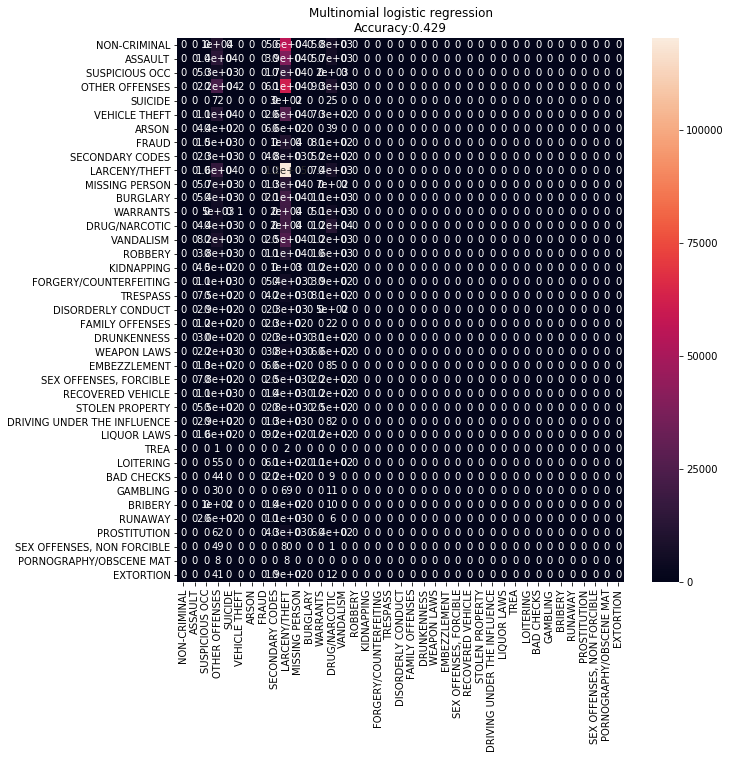

In [0]:
#Put confusion matrix data into a dataframe, and visualize it with heatmap
confusion_df = pd.DataFrame(matrix,
                     index = temp.keys(), 
                     columns = temp.keys())
plt.figure(figsize=(10,10))
plt.title('Multinomial logistic regression\nAccuracy:{0:.3f}'.format(model_score))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(confusion_df, annot=True)
plt.show()